In [2]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
import numpy as np
import math as mt

# Nuclear Energy Physics solutions (sets-4,5,6), copyright Mateusz Kmieć 

# SET 4

## Problem 4.1

#### Absorption of neutrons in the fuel, U-235 + U-238, leads in some cases to fission which gives new fast neutrons.

$\textbf{Derive}$ the formula for $\eta$, the effective number of fission neutrons per one neutron absorbed in fuel.

(1) $$\eta=\nu_{235}\frac{e\sigma_{f235}}{e\left(\sigma_{f}+\sigma_{c}\right)+(1-e)\sigma_{a238}}.$$

the enrichment $e$,

(2) $$e=\frac{N_{235}}{N_{235}+N_{238}}.$$

$\textbf{Deriviation}$ of formula (1) (so called thermal fission factor).

First, let us make an assumption that the chain reaction is occuring in an infinitely large system.
This assumption results in no neutron leakage, which indicates that the effective probability of chain reaction is governed only by the respective capture and fission cross-sections.

By definition thermal fission factor can be interpreted as:

(3) $$\eta=\frac{\text{number of fast neutrons produced in thermal fission}}{\text{number of thermal neutrons absorbed in fuel}}.$$

According to Chapter.9 of the book, written by WG, which shall not be named here, fission caused by thermal neutrons occurs only for $U^{235}$ nuclei in $U^{235}$+$U^{238}$ fuel. 

Consequently, thermal fission factor can be expressed as:
    
(4) $$\eta=\nu_{235}\frac{\text{number of thermal neutrons that fissioned}}{\text{number of thermal neutrons absorbed in fuel}},$$

where $\nu_{235}$ denotes the number of neutrons produced per fisson of $U^{235}$ nuclei.

In the light of the aforementioned definitions, the number of thermal neutrons that fissioned can be expressed as a product of the uranium enrichement ($e$) and the cross-section for $U^{235}$ fission at $0.0253$ eV ($\sigma_{f235}$). 

As far as the denominator of (4) is concerned it can be written as $e\left(\sigma_{f}+\sigma_{c}\right)_{235}+\left(1-e\right)\sigma_{a238}$. At this point it is worth noting that $\sigma_{a238}\approx\sigma_{c238}$ as fission for thermal neutrons is negligible for $U^{238}$.

Having found the number of thermal neutrons that fissioned and the number of thermal neutrons absorbed in fuel we can finally obtain equation (1) from equation (4).

$\textbf{QED}$

a). $\textbf{Study}$ how the fission factor depends on the enrichement and determine the value at an erichment of $0.7$, $1$, $2$ ,$3\%$.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

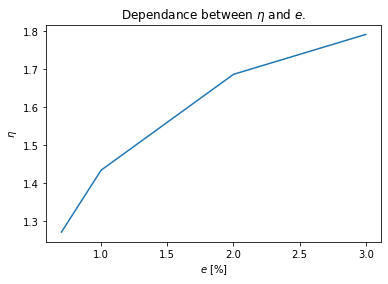

In [113]:
from IPython.display import display, Math

nu235=2.42                              #information fount in chapter.9
e=np.array([0.7,1.0,2.0,3])             #enrichment in percent


sigmaf235=539                           #cross section U-235 capture chapter 9
sigmac235=101                           #cross-section U-235 capture chapter 9
sigmac238=2.72                          #cross-section U-238 capture chapter 9

#eta calculated for 0.7, 1, 2 and 3% enrichment
eta=nu235*((e*sigmaf235)/(e*(sigmaf235+sigmac235)+(100-e)*sigmac238))

display(Math(r"\text{Chain reaction is established for } \ \eta \ \text{equal:}"))
for i in range(4):
    display(Math(r'\\ \eta= {:.2f}; \ \ e={:.2f}\%,'.format(eta[i],e[i])))
    
display(Math(r"\text{where we assume no leakage. The result is in accordance with the result from chapter 9!}"))

plt.plot(e,eta)
plt.title("Dependance between $\eta$ and $e$.")
plt.xlabel("$e$ [%]")
plt.ylabel("$\eta$")
plt.show()

b). $\textbf{Calculate}$ the value of the fission factor, for highly enriched uranium and plutonium fissioned by thermal and fast neutrons.

Uranium with a content of U-235 larger or equal to $20\%$ is called high enriched uranium. That is why from now on I will be using $e=20\%$.

Fission factor for fast neutrons:

(5) $$\epsilon=\frac{\text{number of fast neutrons produced by fissions of all energies}}{\text{number of fast neutrons produced in thermal fission}}.$$

(6) $$\epsilon=\frac{(e\nu_{235}\sigma_{f235}+e\sigma_{ff235}+(1-e)\nu_{238}\sigma_{ff238})}{e\nu_{235}\sigma_{f235}}$$



Data taken from https://www.nuclear-power.net/nuclear-power/reactor-physics/nuclear-fission-chain-reaction/fast-fission-factor/#:~:text=The%20fast%20fission%20factor%20is,neutrons%20produced%20in%20thermal%20fission.&text=This%20arrangement%20increases%20the%20probability,be%20with%20a%20fuel%20nucleus.

In [129]:
#Neutrons produced by fission in U have an average energy of 2 MeV and at this energy
#the significant cross-sections are:



nu235=2.63                              #information fount in chapter.9
nu238=2.60                              #information from 
e=20                                    #enrichment in percent

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff235=1.3                          #fast cross section U-235 capture chapter 9
sigmaf235=539                           #fission cross section U-235 capture chapter 9


#epsilon calculated for 20% enrichment
epsilon=(e*nu235*(sigmaf235+sigmaff235)+(100-e)*nu238*sigmaff238)/(e*nu235*sigmaf235)

display(Math(r'\\ \epsilon= {:.2f}; \ \ e={:.2f}\%,'.format(epsilon,e)))

<IPython.core.display.Math object>

We can repeat this calculation for plutonium.

In [128]:
#Neutrons produced by fission in U have an average energy of 2 MeV and at this energy
#the significant cross-sections are:



nu239=3.16                              #information fount in chapter.9
nu238=2.60                              #information from 
e=20                                    #enrichment in percent

sigmaff238=0.6                          #fast cross section U-235 capture chapter 9
sigmaff239=1.93                         #fast cross section Pu-239 capture chapter 9
sigmaf239=747                           #fission cross section Pu-239 capture chapter 9

#epsilon calculated for 20% enrichment
epsilon=(e*nu239*(sigmaf239+sigmaff239)+(100-e)*nu238*sigmaff238)/(e*nu239*sigmaf239)

display(Math(r'\\ \epsilon= {:.2f}; \ \ e={:.2f}\%,'.format(epsilon,e)))

<IPython.core.display.Math object>

# SET 5

# SET 6

## Problem 6.1

#### Identify and explain the differences between fission and fusion energy. Can fission and fusion work together? Why fusion may need fission?

## Problem 6.2

#### Compare the solar (stellar) fusion cycle with the proposed "terrestial" solutions.

## Problem 6.3

#### Compare magnetic and inertial confinement fusion concepts. 

## Problem 6.4

#### Environmental aspects of energy from fusion.